In [2]:
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
import os


In [22]:
# X is a matrix containing columns as vector in the data set
class kMeansClustering:
    def __init__(self, data ,k):
        # data = list of vectors
        self.X = np.array(data)
        self.n = len(data) # number of rows/vectors
        self.m = len(data[0]) # number of dimensions
        self.k = k 
        self.max_iteration = 20
    
    def kmeans(self):
        self.centroids = self.init_k()
        iters = 0
        oldCentroids = [[0 for _ in range(len(self.X[0]))] for _ in range(self.k) ]
        
        while not self.terminate(oldCentroids, self.centroids, iters):
            iters+=1
            self.labels = self.getLabels(self.centroids)
            if not self.labels:
                self.centroids = self.init_k()
            else: self.centroids = self.getCentroids(self.labels)
        return self.centroids
            
        
    def terminate(self, oldCentroids, currCentroids, iterations):
        if iterations > self.max_iteration:
            return True
        return np.array_equal(oldCentroids, currCentroids)
        
    def init_k(self):
        res = []
        k_set = set() # contains indices of sample that are picked to be initial centroids
        while len(res) < self.k:
            i = random.randint(0, self.n-1)
            if i not in k_set:  
                res.append(self.X[i])  # contain vectors that are chosen to be centers in the matrix 
                k_set.add(i)
        return np.array(res)

    def getLabels(self, centroids):
        # res = np.zeros((1, len(self.X))) # labels are stored in the order of all data points 
        res = []
        # print(len(res))
        vector_list = [[] for _ in range(self.k)]
        for i in range(len(self.X)):
            distance = np.ones((self.k))  # 1 x k array shows k distances of a data point to the k's
            # store labels as a list in which the nested list contains all the vectors/datapoints that are in the same cluster
            for j in range(self.k):
                d  = np.sum((self.X[i] - centroids[j]))**2
                distance[j] = d
            label = np.argmin(distance)
            # print(label)
            vector_list[label].append(self.X[i])
            # print(vector_list)
        for j in range(self.k):
            if not vector_list[j]:
                return []
            res.append(np.array(vector_list[j]))
        
        return res

    def getCentroids(self, labels):
        centroids = np.ones((self.k, len(self.X[0])))
        for i in range(len(labels)):
            centroids[i] = np.mean(labels[i], axis=0)
        return centroids
    
    def mse(self):
        mse = np.ones(self.k)
        for i in range(len(self.centroids)):
            sse=0
            for j in range(len(self.labels[i])):
                sse += np.linalg.norm(self.centroids[i]-self.labels[i][j], ord=2)
                print(sse)
            mse[i] = sse
        return np.mean(mse)

In [4]:
dir_path = r'./photos_no_class'
file_list = []
for root, dirs, files in os.walk(dir_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_list.append({'file_name': file, 'file_path': file_path})
df = pd.DataFrame(file_list)
df

,file_name,file_path
0,food-g554ae271b_640.jpg,./photos_no_class/food-g554ae271b_640.jpg
1,cat-g4ae5d18aa_640.jpg,./photos_no_class/cat-g4ae5d18aa_640.jpg
2,girl-gb9f87fafe_640.jpg,./photos_no_class/girl-gb9f87fafe_640.jpg
3,pasta-ge05c4d3a5_640.jpg,./photos_no_class/pasta-ge05c4d3a5_640.jpg
4,grandparents-g83fa83a69_640.jpg,./photos_no_class/grandparents-g83fa83a69_640.jpg
...,...,...
75,dog-g0973e56d5_640.jpg,./photos_no_class/dog-g0973e56d5_640.jpg
76,salad-bar-g5de038197_640.jpg,./photos_no_class/salad-bar-g5de038197_640.jpg
77,father-g7328a944c_640.jpg,./photos_no_class/father-g7328a944c_640.jpg
78,man-gb4440ab53_640.jpg,./photos_no_class/man-gb4440ab53_640.jpg


In [5]:
# preprocess image
def loadImages(dfImages):
    img_array = []
    for i in range(len(dfImages)):
        img_array.append(cv2.imread(dfImages['file_path'][i]))
    dfImages['img_array'] = img_array
loadImages(df)
df

,file_name,file_path,img_array
0,food-g554ae271b_640.jpg,./photos_no_class/food-g554ae271b_640.jpg,"[[[87, 161, 227], [90, 164, 230], [90, 164, 23..."
1,cat-g4ae5d18aa_640.jpg,./photos_no_class/cat-g4ae5d18aa_640.jpg,"[[[42, 39, 31], [42, 39, 31], [42, 39, 31], [4..."
2,girl-gb9f87fafe_640.jpg,./photos_no_class/girl-gb9f87fafe_640.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,pasta-ge05c4d3a5_640.jpg,./photos_no_class/pasta-ge05c4d3a5_640.jpg,"[[[246, 242, 237], [246, 242, 237], [246, 242,..."
4,grandparents-g83fa83a69_640.jpg,./photos_no_class/grandparents-g83fa83a69_640.jpg,"[[[163, 182, 187], [159, 178, 183], [149, 168,..."
...,...,...,...
75,dog-g0973e56d5_640.jpg,./photos_no_class/dog-g0973e56d5_640.jpg,"[[[173, 157, 150], [174, 158, 151], [175, 159,..."
76,salad-bar-g5de038197_640.jpg,./photos_no_class/salad-bar-g5de038197_640.jpg,"[[[83, 85, 93], [85, 87, 95], [83, 85, 93], [8..."
77,father-g7328a944c_640.jpg,./photos_no_class/father-g7328a944c_640.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
78,man-gb4440ab53_640.jpg,./photos_no_class/man-gb4440ab53_640.jpg,"[[[244, 243, 247], [244, 243, 247], [244, 243,..."


In [ ]:
# choose another k
mse = {}
def computeMSE(file_path, k):
    data = cv2.imread(file_path)
    X=[]
    for r in range(len(data)):
        for c in range(len(data[0])):
            X.append(data[r][c])

# print(data[0], data[0].shape)
    kmeans=kMeansClustering(X,k)
    centroids = kmeans.kmeans()
    sse = kmeans.mse()
    return sse

mse[7] = computeMSE("./photos_no_class/pasta-ge05c4d3a5_640.jpg",7)
mse[5] = computeMSE("./photos_no_class/pasta-ge05c4d3a5_640.jpg",5)
mse[10] = computeMSE("./photos_no_class/pasta-ge05c4d3a5_640.jpg",10)
mse[15] =computeMSE("./photos_no_class/pasta-ge05c4d3a5_640.jpg",15)
mse[40] = computeMSE("./photos_no_class/pasta-ge05c4d3a5_640.jpg",40)

In [7]:
class LVQ:
    def __init__(self, image, k):
        self.image = image
        self.k = k
        self.isCompressed = False
        self.compressed = [[ 0 for _ in range(len(self.image[0])) ] for _ in range(len(self.image))]
        self.haveCentroids = False
        self.centroids = self.getCentroids()
        
    def getCentroids(self):
        if not self.haveCentroids:
            X=[]
            for r in range(len(self.image)):
                for c in range(len(self.image[0])):
                    X.append(self.image[r][c])
                    
            kmeans=kMeansClustering(X, self.k)
            self.centroids = kmeans.kmeans()
        return self.centroids
        
    def compress(self):
        if not self.isCompressed:
            self.isCompressed = True
            centroids = self.getCentroids()
            for r in range(len(self.image)):
                distance = np.zeros((len(centroids)))
                for c in range(len(self.image[0])):
                    for i in range(len(centroids)):
                        distance[i] = np.sum((self.image[r][c] - centroids[i])**2)
                        # print("done")
                        
                    # print(distance)
                    self.compressed[r][c] = np.argmin(distance)
                    self.image[r][c] = centroids[np.argmin(distance)]
        return self.compressed
    
    def display(self):
        if not self.isCompressed:
            self.compress()
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))

def displayFromCompressed(compressedImg, centroids):
    img = []
    for r in range(len(compressedImg)):
        row = []
        for c in range(len(compressedImg[0])):
            row.append(centroids[compressedImg[r][c]])
        img.append(row)
    plt.imshow(cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB))

                
        

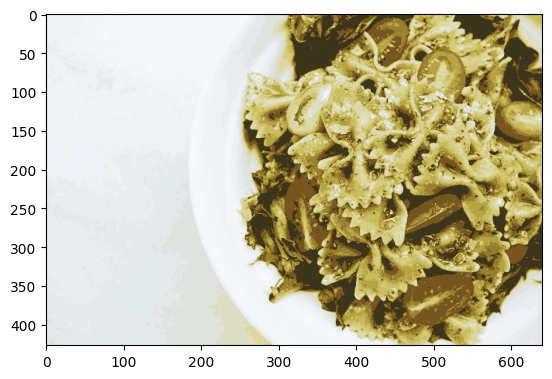

In [42]:
img = df['img_array'][3]
lvq = LVQ(img, 15)
lvq.display()


In [35]:
def plotElbow(mse):
    plt.figure()
    plt.plot(list(mse.keys()), list(mse.values()))
    plt.ylabel("Value of K")
    plt.ylabel("MSE")
    plt.show()

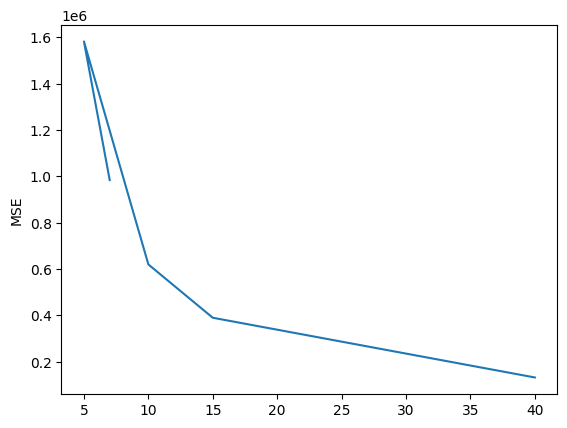

In [36]:
plotElbow(mse)